In [88]:
#carga de librearías
import numpy as np
import pandas as pd
import seaborn as sns

import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Parte 1: Solución cerrada de regresión lineal

Utilizando numpy, generar 100 datos que se encuentren entre 0 y 3. Este vector será la variable dependiente

In [89]:
np.random.seed(10)
rcParams['figure.figsize'] = 12, 6

In [90]:
#Para generar 100 observaciones que se encuentren entre 0 y 3, dado que rand no permite especificar el tamaño, podemos utilizar
#una distribución uniforme entre 0 y 1 y multiplicarlo por 3 para obtener el vector deseado
experiencia = np.random.rand(100,1)*3
experiencia.shape

(100, 1)

Generar 100 datos de la variable dependiente (Y) de la siguiente forma y = 5 + 2x + u(-2,5)

In [91]:
# Creación de variable uniforme para la ecuación de la regresión lineal
u = np.random.uniform(-2, 5,100)
u = u.reshape(-1,1)

#Creamos la variable dependiente acorde a lo anterior
salario = 5 + 2*experiencia + u
salario.shape, u.shape

((100, 1), (100, 1))

Utilizando matplotlib o seaborn, generar gráfico de dispersión para ver la relación entre las variables

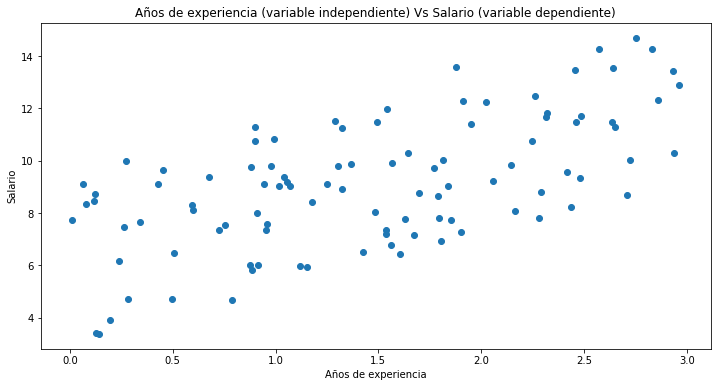

In [92]:
#Gráfico de dispersión de variable x versus y
plt.scatter(experiencia, salario)
plt.title("Años de experiencia (variable independiente) Vs Salario (variable dependiente)")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()
#Del gráfico podemos observar que a medida que aumentan los años de experiencia el salario también aumenta, esto se ve en que 
#A medida que la variable x incrementa, la Y también lo hace, existe una correlación positiva.

Estudie y aplique los métodos disponibles en numpy.linalg para ajustar una regresión lineal a través de su solución cerrada. Cuál es el MSE.

In [93]:
experiencia_ = np.c_[np.ones((100,1)), experiencia] #Genero el theta 0 que sería el coeficiente que no tiene asociado
# ninguna variable independiente

theta_opt = np.linalg.inv(experiencia_.T.dot(experiencia_)).dot(experiencia_.T).dot(salario) #Se calculan los betas 
# usando el estimador de máxima verosimilitud con la solución cerrada
theta_opt 

array([[6.45748702],
       [1.83093481]])

In [94]:
#Calculamos la predicción y verificamos sus dimensiones.
salario_ = theta_opt[1] * experiencia + theta_opt[0] #calculo del salario con predicción 
salario_.shape

(100, 1)

In [95]:
#Metodo de error cuadrático medio 1
err2 = (salario_ - salario)**2 #error cuadrático medio
ECM1 = 1/len(experiencia) * np.sum(err2)

#Metodo de error cuadrático medio utilizando la librería sklearn
ECM2 = mean_squared_error(salario,salario_)

print("ECM utilizando diferencia de cuadrados: ", np.round(ECM1,4))
print("ECM utilizando sklearn: ", np.round(ECM2,4))

ECM utilizando diferencia de cuadrados:  3.6539
ECM utilizando sklearn:  3.6539


Utiliznado matplotlib generar un gráfico que incluya la recta de la regresión y los datos utilizados para el entrenamiento

In [96]:
#Generamos puntos nuevos para poder calcular la recta proveniente de la regresión lineal.
experiencian = np.array([[0], [5]])
experiencian


array([[0],
       [5]])

In [97]:
theta_opt.shape

(2, 1)

In [98]:
experiencian_ = np.c_[np.ones((2,1)), experiencian] 
salarion_ = experiencian_.dot(theta_opt)
salarion_,experiencian

(array([[ 6.45748702],
        [15.61216108]]),
 array([[0],
        [5]]))

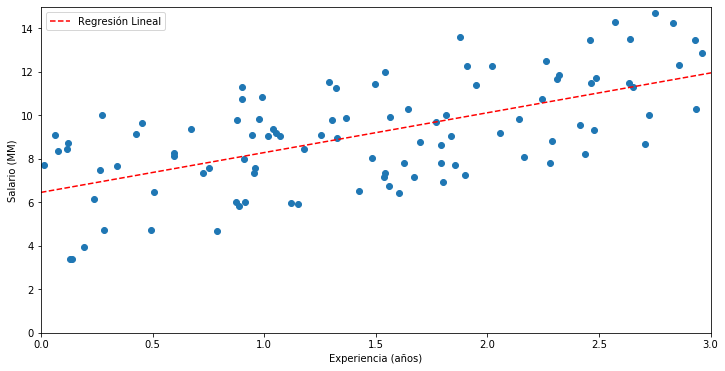

In [99]:
plt.plot(experiencian, salarion_, 'r--')
plt.scatter(experiencia,salario)
plt.ylabel('Salario (MM)')
plt.xlabel('Experiencia (años)')
plt.axis([0, 3, 0, 15])
plt.legend(["Regresión Lineal"])
plt.show()

## Regresión polinomial

Función de aumento de orden para la variable independiente

In [166]:
#Funciones a utilizar en regresiones polinomiales
def degree_increment(power,data,bias=True): #ingresar la variable como character ''
    polinomio = PolynomialFeatures(degree = power, include_bias=bias)
    data_poly = polinomio.fit_transform(data)
    return data_poly

Muestreo de 200 registros para el desarrollo del modelo

In [101]:
# Utilizar la función read_csv para cargar el archivo
ts = pd.read_csv("ts.csv")
ts_sample = ts.sample(200, random_state = 1) #Sampleo de 200 datos para trabajarlos
ts_sample_lineal = ts_sample['tiempo'].values.reshape(-1,1) #Transformación lineal para poder graficar la regresión


ts_sample.shape, ts_sample, ts_sample_lineal.shape

((200, 2),
         tiempo  magnitud
 1208  2.455303 -1.223792
 781   0.204751 -0.971784
 154  -1.086181  0.389062
 656  -0.225971  1.718892
 962   0.816989 -0.111078
 ...        ...       ...
 813   0.275730 -0.781808
 388  -0.609157 -0.440627
 1045  1.088902  0.323153
 1117  1.576507 -0.355332
 404  -0.588773 -0.397980
 
 [200 rows x 2 columns],
 (200, 1))

Visualización de curva de luz mediante scatter plot

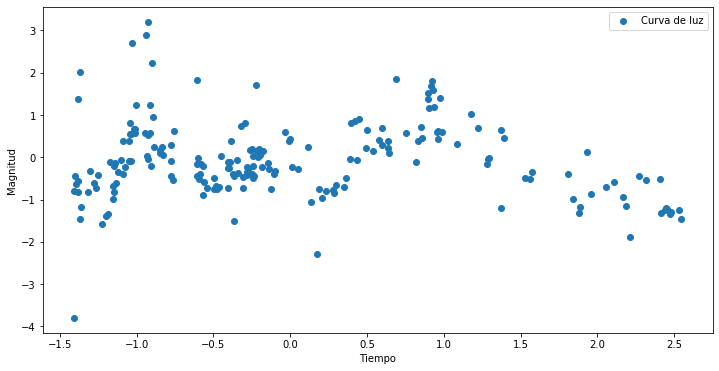

In [102]:
plt.scatter(x = 'tiempo', y = 'magnitud', data = ts_sample)
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.legend(["Curva de luz"])
plt.show()

Transformación polinomial de variable independiente tiempo. 

Creamos 6 distintas transformaciones polinomiales para los datos y de esta forma poder comparar los gráficos que obtendremos

In [167]:
pol_2 = degree_increment(power = 2, data = ts_sample_lineal) #orden 2
pol_4 = degree_increment(power = 4, data = ts_sample_lineal) #orden 4
pol_6 = degree_increment(power = 6, data = ts_sample_lineal) #orden 6
pol_8 = degree_increment(power = 8, data = ts_sample_lineal) #orden 8
pol_10 = degree_increment(power = 10, data = ts_sample_lineal) #orden 10
pol_12 = degree_increment(power = 12, data = ts_sample_lineal) #orden 12

print('A continuación se presentan las dimensiones de los polinomios, incluye la variable de orden 1\n'),

print('Dimensiones polinomio orden 2: ', pol_2.shape,
     '\nDimensiones polinomio orden 4: ', pol_4.shape,
     '\nDimensiones polinomio orden 6: ', pol_6.shape,
     '\nDimensiones polinomio orden 8: ', pol_8.shape,
     '\nDimensiones polinomio orden 10: ', pol_10.shape,
     '\nDimensiones polinomio orden 12: ', pol_12.shape)


A continuación se presentan las dimensiones de los polinomios, incluye la variable de orden 1

Dimensiones polinomio orden 2:  (200, 3) 
Dimensiones polinomio orden 4:  (200, 5) 
Dimensiones polinomio orden 6:  (200, 7) 
Dimensiones polinomio orden 8:  (200, 9) 
Dimensiones polinomio orden 10:  (200, 11) 
Dimensiones polinomio orden 12:  (200, 13)


Ajuste de las regresiones polinomiales de diferentes grados

In [168]:
######################seteo de modelos######################################
model2 = LinearRegression()  #inicio de variable modelo de regresión lineal
model4 = LinearRegression()  #inicio de variable modelo de regresión lineal
model6 = LinearRegression()  #inicio de variable modelo de regresión lineal
model8 = LinearRegression()  #inicio de variable modelo de regresión lineal
model10 = LinearRegression()  #inicio de variable modelo de regresión lineal
model12 = LinearRegression()  #inicio de variable modelo de regresión lineal
############################################################################

####################Fit de modelos de orden superior########################
model2.fit(pol_2, ts_sample['magnitud']) #polinomio orden 2
model4.fit(pol_4, ts_sample['magnitud']) #polinomio orden 2
model6.fit(pol_6, ts_sample['magnitud']) #polinomio orden 2
model8.fit(pol_8, ts_sample['magnitud']) #polinomio orden 2
model10.fit(pol_10, ts_sample['magnitud']) #polinomio orden 2
model12.fit(pol_12, ts_sample['magnitud']) #polinomio orden 2
#############################################################################

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Gráfico de todos los modelos 

In [169]:
#Armado de regresiones polinomiales
ts_lin = np.linspace(min(ts_sample['tiempo']),max(ts_sample['tiempo'])).reshape(-1,1)

data_poly_plot_2 = degree_increment(power = 2, data = ts_lin)
data_poly_plot_4 = degree_increment(power = 4, data = ts_lin)
data_poly_plot_6 = degree_increment(power = 6, data = ts_lin)
data_poly_plot_8 = degree_increment(power = 8, data = ts_lin)
data_poly_plot_10 = degree_increment(power = 10, data = ts_lin)
data_poly_plot_12 = degree_increment(power = 12, data = ts_lin)

y_pred_2 = model2.predict(data_poly_plot_2)
y_pred_4 = model4.predict(data_poly_plot_4)
y_pred_6 = model6.predict(data_poly_plot_6)
y_pred_8 = model8.predict(data_poly_plot_8)
y_pred_10 = model10.predict(data_poly_plot_10)
y_pred_12 = model12.predict(data_poly_plot_12)


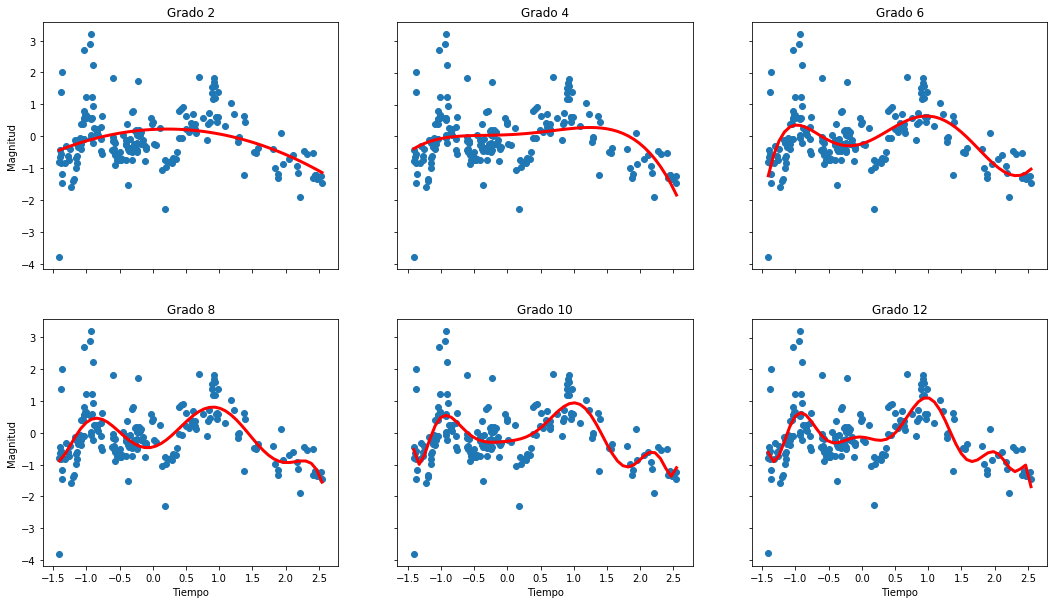

In [170]:
#Código que grafica las regresiones
fig, axs = plt.subplots(2, 3,figsize=(18,10))

axs[0, 0].plot(ts_lin,y_pred_2, color='red', linewidth = 3)
axs[0, 0].scatter(ts_sample['tiempo'], ts_sample['magnitud'])
axs[0, 0].set_title('Grado 2')

axs[0, 1].plot(ts_lin,y_pred_4, color='red', linewidth = 3)
axs[0, 1].scatter(ts_sample['tiempo'], ts_sample['magnitud'])
axs[0, 1].set_title('Grado 4')

axs[0, 2].plot(ts_lin,y_pred_6, color='red', linewidth = 3)
axs[0, 2].scatter(ts_sample['tiempo'], ts_sample['magnitud'])
axs[0, 2].set_title('Grado 6')

axs[1, 0].plot(ts_lin,y_pred_8, color='red', linewidth = 3)
axs[1, 0].scatter(ts_sample['tiempo'], ts_sample['magnitud'])
axs[1, 0].set_title('Grado 8')


axs[1, 1].plot(ts_lin,y_pred_10, color='red', linewidth = 3)
axs[1, 1].scatter(ts_sample['tiempo'], ts_sample['magnitud'])
axs[1, 1].set_title('Grado 10')

axs[1, 2].plot(ts_lin,y_pred_12, color='red', linewidth = 3)
axs[1, 2].scatter(ts_sample['tiempo'], ts_sample['magnitud'])
axs[1, 2].set_title('Grado 12')

for ax in axs.flat:
    ax.set(xlabel='Tiempo', ylabel='Magnitud')
    
for ax in axs.flat:
    ax.label_outer()

Conclusiones: Se puede observar a medida que se aumenta el grado del polinomio que la regresión se ajusta cada vez mejor a la data de entrenamiento, sin embargo no tenemos que guiarnos solamente por esto puesto que podemos caer en un overfitting, que vendría siendo que nuestro modelo se sobreajuste al entrenamiento, aprendiendolo "de memoria" y cayendo en el Error cuadrático medio de la data de testeo, por esto es necesario calibrar los niveles de varianza y de sesgo que queremos en el modelo, ya sea agregando nuevas variables (que pueden ser multiplicaciones entre independientes) que agreguen mayor nivel de explicación al modelo (menor sesgo y mayor varianza) o eliminando términos de orden superior (disminución de la varianza y aumento del sesgo). Se observa claramente que para la regresión de grado 12 la curva se sobreajusta a los datos de entrenamiento, podríamos concluir que no tendrá buenas métricas para datos de testeo posteriores.

# Parte 3: Ridge y Lasso

## Ridge

A continuación creamos polinomios de orden 10 y 20 para poder notar las diferencias al incorporar los términos que generan una disminución en la varianza del modelo de regresión polinomial

In [172]:
#Generamos predictores polinómicos
time_10 = pd.DataFrame(degree_increment(power = 10, data = ts_sample.tiempo.values.reshape(-1,1), bias= False),columns = ['x%d'%i for i in range(1,11)])
time_20 = pd.DataFrame(degree_increment(power = 20, data = ts_sample.tiempo.values.reshape(-1,1), bias = False),columns = ['x%d'%i for i in range(1,21)])

data_10 = time_10.merge(ts_sample, left_on = 'x1', right_on ='tiempo')
data_10.drop(columns = ['tiempo'],inplace=True)
data_10.sort_values(by='x1',inplace=True)

data_20 = time_20.merge(ts_sample, left_on = 'x1', right_on ='tiempo')
data_20.drop(columns = ['tiempo'],inplace=True)
data_20.sort_values(by='x1',inplace=True)

#Alphas 
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [173]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['magnitud'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x1'],y_pred, color='red')
        plt.plot(data['x1'],data['magnitud'],'.', color='black')
        plt.title('Alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['magnitud'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

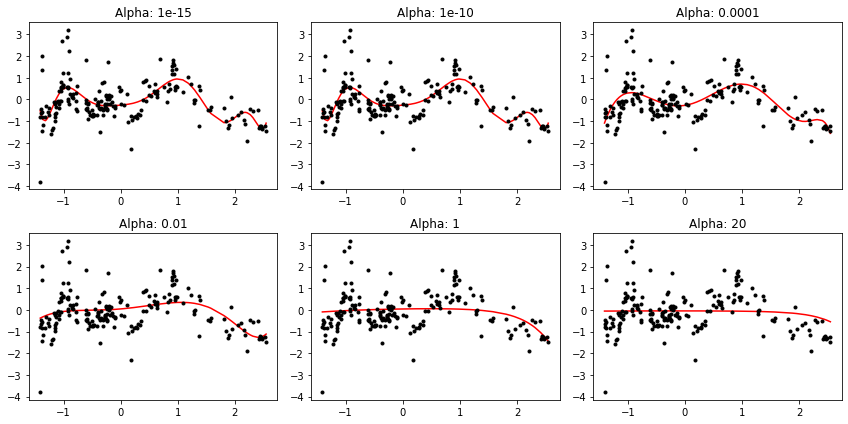

In [174]:
#Ridge Regression.
#Polinomio grado 10

#Initialize predictors to all 20 powers of x
predictors_10_ridge=['x1']
predictors_10_ridge.extend(['x%d'%i for i in range(2,11)])

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,11)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-2:234, 1:235, 20:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data_10, predictors_10_ridge, alpha_ridge[i], models_to_plot)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.40957e-17): result may not be accurate.
  overwrite_a=True).T


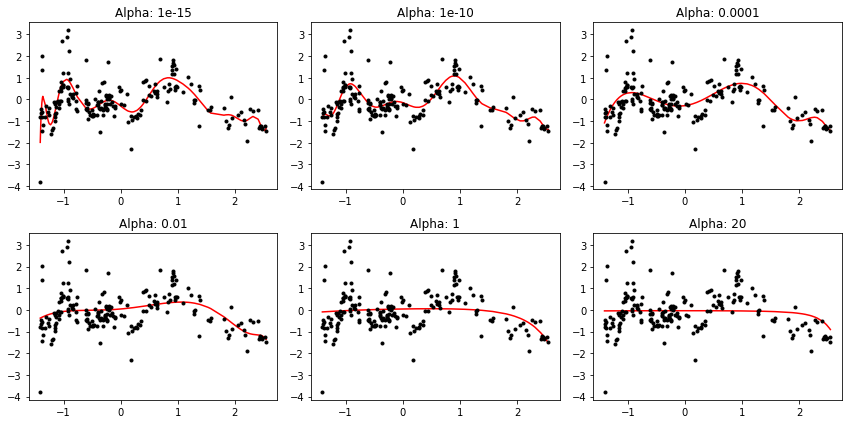

In [175]:
#Ridge Regression
#Polinomio grado 20

#Initialize predictors to all 20 powers of x
predictors_20_ridge=['x1']
predictors_20_ridge.extend(['x%d'%i for i in range(2,21)])

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,21)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-2:234, 1:235, 20:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data_20, predictors_20_ridge, alpha_ridge[i], models_to_plot)

## Conclusiones Ridge:
Podemos notar que a medida que el parámetro alpha aumenta, penaliza en mayor medida a los términos de orden superior, esto contribuya a una disminución sostenida en la varianza del modelo y por ende a un incremento del sesgo. 
Lo que tenemos que tomar en consideración es que no es bueno que tengamos un modelo con mucha varianza pero tampoco con mucho sesgo por lo que un parámetro que se ve atractivo para nuestro modelo podría ser o el Alpha = 0.0001 o Alpha = 0.01

## Lasso

In [177]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(data[predictors],data['magnitud'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x1'],y_pred, color='red')
        plt.plot(data['x1'],data['magnitud'],'.', color='black')
        plt.title('Alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['magnitud'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.072070737647635, tolerance: 0.016383922223891945
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.072008836408145, tolerance: 0.016383922223891945
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.06588100600109, tolerance: 0.016383922223891945
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.30525841061113, tolerance: 0.01638

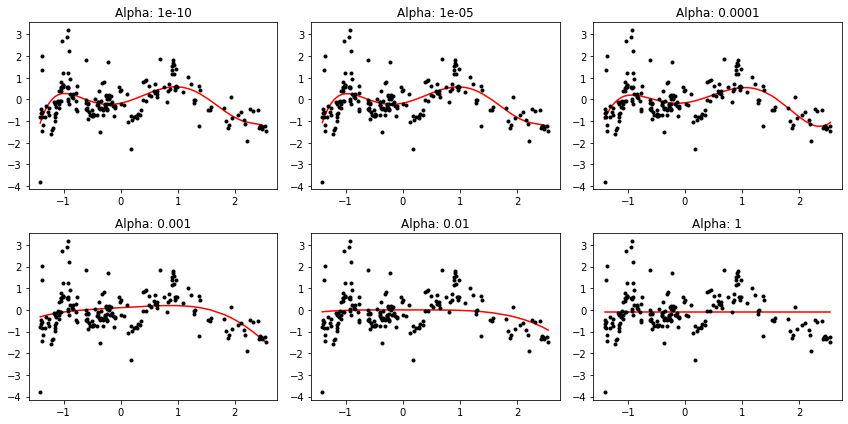

In [178]:
#Lasso Regression
#Polinomio grado 10

#Initialize predictors to all 10 powers of x
predictors_10_lasso=['x1']
predictors_10_lasso.extend(['x%d'%i for i in range(2,11)])

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,11)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data_10, predictors_10_lasso, alpha_lasso[i], models_to_plot)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.50343733797489, tolerance: 0.016383922223891945
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.50335071859581, tolerance: 0.016383922223891945
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.49477632073482, tolerance: 0.016383922223891945
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.74547008525978, tolerance: 0.0163839

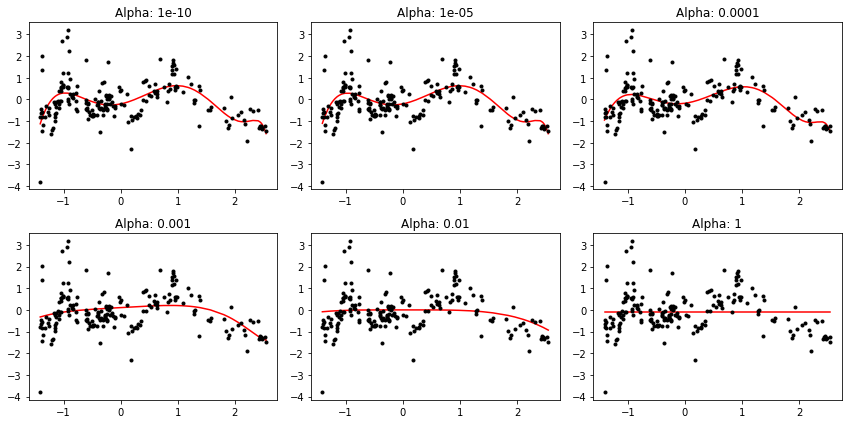

In [179]:
#Lasso Regression
#Polinomio grado 20

#Initialize predictors to all 20 powers of x
predictors_20_lasso=['x1']
predictors_20_lasso.extend(['x%d'%i for i in range(2,21)])

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,21)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data_20, predictors_20_lasso, alpha_lasso[i], models_to_plot)

## Conclusiones
A diferencia de la penalización usando Ridge, en Lasso podemos notar que se llega a una varianza casi nula mucho más rápido, esto es porque las regresiones Lasso penalizan de tal forma los coeficientes de orden superior al penalizar el valor absoluto, que si el coef, no es necesario lo elimina dejándolo en 0, a diferencia de Ridge en donde le baja la importancia al coeficiente, disminuyendo su impacto, por eso es que podemos ver como la curva pierde sus órdenes superiores de forma más pronunciada

# Parte 4: Clasificación de estrellas variables

## Carga de base de datos de estrellas

In [107]:
# Utilizar la función read_csv para cargar el archivo
ts2 = pd.read_csv("ts2.csv")
ts2.shape, ts2

((5000, 14),
      Class  Amplitude  AndersonDarling  Autocor_length  Beyond1Std   Gskew  \
 0      lpv    0.02700         0.000000               3    0.270000  0.0190   
 1      lpv    0.21400         0.000000              18    0.346667  0.1260   
 2      ecl    0.27050         0.000000               1    0.223333  0.2320   
 3      lpv    0.34250         0.000000              13    0.396667 -0.0170   
 4      lpv    0.01075         0.097155               1    0.313830 -0.0020   
 ...    ...        ...              ...             ...         ...     ...   
 4995   lpv    0.04000         0.112777               2    0.340000  0.0040   
 4996   lpv    0.21250         0.000000              50    0.463333 -0.0655   
 4997   lpv    0.02175         0.030271               4    0.333333  0.0100   
 4998   lpv    0.02650         0.446972               2    0.313333  0.0030   
 4999   lpv    0.03600         0.031931               6    0.336667 -0.0040   
 
       LinearTrend   MaxSlope       M

## Análisis Descriptivo y procesamiento de variables

In [108]:
#Evaluación del tipo de variables del dataset
ts2.dtypes

Class                object
Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [109]:
#Transformación de variable Class a categórica
ts2['Class']= ts2['Class'].astype('category')
ts2.dtypes, ts2.Class.unique()

(Class               category
 Amplitude            float64
 AndersonDarling      float64
 Autocor_length         int64
 Beyond1Std           float64
 Gskew                float64
 LinearTrend          float64
 MaxSlope             float64
 Mean                 float64
 Meanvariance         float64
 MedianAbsDev         float64
 MedianBRP            float64
 PercentAmplitude     float64
 PeriodLS             float64
 dtype: object,
 [lpv, ecl, rrlyr, cep, NonVar, dsct, t2cep, dpv, acep]
 Categories (9, object): [lpv, ecl, rrlyr, cep, ..., dsct, t2cep, dpv, acep])

In [110]:
#guardamos todas las clases 
clases = np.array(ts2.Class.unique())
clases

array(['lpv', 'ecl', 'rrlyr', 'cep', 'NonVar', 'dsct', 't2cep', 'dpv',
       'acep'], dtype=object)

In [111]:
#Creacion de diccionario de datos para calcular los pesos por cada una de las categorías para las estadísticas de tendencia 
nrow = pd.DataFrame(columns=clases)
dimensiones = []
pesos = []

for i in clases:
    dimensiones.append(len(ts2[ts2['Class'] == i]))
    pesos.append(1/len(ts2[ts2['Class'] == i]))

    
diccionario = {
    'Class':clases,
    'Dimensiones': dimensiones,
    'Pesos': pesos
}



#b.Transformación a Dataframe con pandas
diccionario_df = pd.DataFrame(diccionario)    
diccionario_df['Class']= diccionario_df['Class'].astype('category')    
    
diccionario_df,dimensiones, pesos, diccionario_df.dtypes

(    Class  Dimensiones     Pesos
 0     lpv         3775  0.000265
 1     ecl          484  0.002066
 2   rrlyr          506  0.001976
 3     cep          107  0.009346
 4  NonVar           82  0.012195
 5    dsct           32  0.031250
 6   t2cep           11  0.090909
 7     dpv            1  1.000000
 8    acep            2  0.500000,
 [3775, 484, 506, 107, 82, 32, 11, 1, 2],
 [0.00026490066225165563,
  0.002066115702479339,
  0.001976284584980237,
  0.009345794392523364,
  0.012195121951219513,
  0.03125,
  0.09090909090909091,
  1.0,
  0.5],
 Class          category
 Dimensiones       int64
 Pesos           float64
 dtype: object)

In [112]:
#Promedio simple
ts2["pesos"] = np.nan

In [113]:
for i in clases:
    b = diccionario_df.loc[(diccionario_df["Class"] == i), "Pesos"]
    ts2.loc[(ts2["Class"] == i), "pesos"] = b.iloc[0]

ts2.shape   

(5000, 15)

In [114]:
#Seteo de variables del modelo para estadísticos descriptivos
variables = ["Amplitude"
                                ,"AndersonDarling"
                                ,"Autocor_length"
                                ,"Beyond1Std"
                                ,"Gskew"
                                ,"LinearTrend"
                                ,"MaxSlope"
                                ,"Mean"
                                ,"Meanvariance"
                                ,"MedianAbsDev"
                                ,"MedianBRP"
                                ,"PercentAmplitude"
                                ,"PeriodLS"
                               ]

#Estadísticos descriptivos de Tendencia Central

#Tabla con promedio simple
table_mean = pd.pivot_table(ts2,index=["Class"]
                       ,values=variables
               ,aggfunc=np.mean)

#Tabla con mediana
table_median = pd.pivot_table(ts2,index=["Class"]
                       ,values=variables
               ,aggfunc=np.median)

#Tabla con Varianza
table_var = pd.pivot_table(ts2,index=["Class"]
                       ,values=variables
               ,aggfunc=np.var)

#Tabla con Desviacion estándar
table_std = pd.pivot_table(ts2,index=["Class"]
                       ,values=variables
               ,aggfunc=np.std)

#Rango
ts_rango = pd.DataFrame(columns=clases)


#Rango
for i in clases:
    ini = ts2[ts2['Class'] == i].max()
    fin = ts2[ts2['Class'] == i].min()
    ini = ini.iloc[1:]
    fin = fin.iloc[1:]
    
    rango = ini - fin
    ts_rango[i] = rango



### Estadística descriptiva de Tendencia Central

Promedio de variable para cada Clase

In [115]:
table_mean

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
Class,,,,,,,,,,,,,
NonVar,0.022866,0.135241,1.012195,0.288290,0.002970,0.000005,2.008790,15.789335,0.000729,0.007189,0.541336,0.002812,64.689062
acep,0.268750,0.000000,5.500000,0.468333,-0.228000,0.000017,6.505490,17.281444,0.009614,0.116500,0.291667,0.024215,1.012398
cep,0.183822,0.029574,1.252336,0.428634,-0.071565,-0.000025,1.717539,16.145929,0.007098,0.093280,0.221424,0.015067,2.337718
dpv,0.064000,0.064502,1.000000,0.347222,0.024000,0.000033,0.128342,17.024069,0.002041,0.027000,0.305556,0.004877,2.229941
dsct,0.410719,0.080104,1.000000,0.280097,0.138187,0.000004,23.869599,19.856215,0.010154,0.125688,0.519575,0.038122,0.451975
ecl,0.199064,0.007999,1.871901,0.224079,0.202963,0.000088,8.338255,18.026616,0.005505,0.048706,0.580100,0.022417,16.334861
lpv,0.070987,0.158056,5.560265,0.319494,0.002922,-0.000014,0.615084,14.104851,0.002769,0.026873,0.410810,0.007490,397.424340
rrlyr,0.261010,0.069247,1.084980,0.374208,-0.049857,0.000032,6.666273,17.965605,0.008142,0.108070,0.303451,0.020877,0.553407
t2cep,0.258114,0.000066,1.909091,0.365163,0.101136,0.000039,1.911687,15.566716,0.010219,0.122364,0.233639,0.024950,11.174373


Mediana para cada Clase

In [116]:
table_median

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
Class,,,,,,,,,,,,,
NonVar,0.02300,0.032956,1.0,0.286667,0.00300,0.000003,1.946302,15.999879,0.000730,0.00750,0.534225,0.002845,0.332805
acep,0.26875,0.000000,5.5,0.468333,-0.22800,0.000017,6.505490,17.281444,0.009614,0.11650,0.291667,0.024215,1.012398
cep,0.17150,0.000000,1.0,0.436667,-0.05350,-0.000001,0.824579,16.314947,0.006588,0.09000,0.203333,0.013668,1.763476
dpv,0.06400,0.064502,1.0,0.347222,0.02400,0.000033,0.128342,17.024069,0.002041,0.02700,0.305556,0.004877,2.229941
dsct,0.41050,0.001922,1.0,0.282124,0.13300,0.000002,5.004985,20.182291,0.010538,0.12525,0.528479,0.040628,0.165097
ecl,0.16975,0.000000,1.0,0.222778,0.14675,0.000006,1.577163,18.266029,0.004932,0.04400,0.596667,0.018831,0.842026
lpv,0.02900,0.057107,3.0,0.316872,0.00150,-0.000004,0.241546,14.022595,0.001061,0.01000,0.413333,0.003317,38.536635
rrlyr,0.25900,0.000244,1.0,0.370000,-0.01500,0.000003,2.340872,18.733154,0.007782,0.10675,0.303333,0.020228,0.533391
t2cep,0.26550,0.000000,1.0,0.379310,0.04100,0.000005,0.874211,15.309160,0.010251,0.13500,0.230000,0.022605,7.080257


### Estadística descriptiva de Dispersión

Varianza para cada Clase

In [117]:
table_var

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
Class,,,,,,,,,,,,,
NonVar,0.000021,4.193788e-02,0.012195,0.000832,0.000024,9.543948e-11,0.388557,0.618578,1.458904e-08,0.000002,0.007364,4.023590e-07,1.261783e+05
acep,0.009870,0.000000e+00,4.500000,0.001250,0.048050,2.000000e-12,34.513600,0.868500,5.729113e-06,0.000050,0.008450,1.723110e-04,2.057291e-03
cep,0.007335,1.414548e-02,1.152707,0.002589,0.007741,1.373906e-08,6.769758,1.062339,1.016089e-05,0.001634,0.005317,5.593146e-05,4.751043e+00
dsct,0.036639,2.645438e-02,0.000000,0.000677,0.018304,8.630282e-10,3662.544240,1.835961,1.923871e-05,0.003117,0.005328,2.623408e-04,5.685911e-01
ecl,0.016452,3.456234e-03,4.285834,0.005494,0.038802,3.387515e-06,312.952876,1.803473,1.095302e-05,0.001079,0.028314,2.299123e-04,2.914121e+04
lpv,0.018345,4.506058e-02,44.745639,0.001742,0.008495,1.673683e-07,1.853699,0.797241,3.248969e-05,0.003826,0.008158,1.846019e-04,1.139001e+06
rrlyr,0.009012,2.931680e-02,0.268012,0.002512,0.011784,1.293877e-07,234.623932,1.709351,8.210416e-06,0.001188,0.007562,6.421530e-05,1.278278e+00
t2cep,0.021886,4.763929e-08,1.890909,0.001987,0.026627,8.998055e-09,7.828501,2.049019,3.352654e-05,0.003388,0.003715,3.556094e-04,1.614706e+02


Desviación Estándar para cada Clase

In [118]:
table_std

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
Class,,,,,,,,,,,,,
NonVar,0.004551,0.204787,0.110432,0.028846,0.004907,0.000010,0.623343,0.786497,0.000121,0.001578,0.085811,0.000634,355.215821
acep,0.099349,0.000000,2.121320,0.035355,0.219203,0.000001,5.874828,0.931934,0.002394,0.007071,0.091924,0.013127,0.045357
cep,0.085646,0.118935,1.073642,0.050884,0.087980,0.000117,2.601876,1.030699,0.003188,0.040422,0.072915,0.007479,2.179689
dsct,0.191414,0.162648,0.000000,0.026018,0.135292,0.000029,60.518958,1.354976,0.004386,0.055827,0.072992,0.016197,0.754050
ecl,0.128264,0.058790,2.070226,0.074120,0.196983,0.001841,17.690474,1.342934,0.003310,0.032854,0.168268,0.015163,170.707981
lpv,0.135443,0.212275,6.689218,0.041735,0.092168,0.000409,1.361506,0.892884,0.005700,0.061852,0.090320,0.013587,1067.239988
rrlyr,0.094934,0.171222,0.517698,0.050120,0.108556,0.000360,15.317439,1.307422,0.002865,0.034467,0.086959,0.008013,1.130610
t2cep,0.147940,0.000218,1.375103,0.044578,0.163176,0.000095,2.797946,1.431440,0.005790,0.058206,0.060955,0.018858,12.707107


Rango de las Clases

In [119]:
ts_rango

,lpv,ecl,rrlyr,cep,NonVar,dsct,t2cep,dpv,acep
Amplitude,1.6935,0.7445,0.545,0.38,0.02,0.674,0.481,0,0.1405
AndersonDarling,0.980413,0.751133,0.96263,0.782396,0.845245,0.626249,0.000724,0,0
Autocor_length,69,23,6,10,1,0,4,0,3
Beyond1Std,0.438582,0.41953,0.314445,0.271127,0.132597,0.128639,0.136667,0,0.05
Gskew,3.242,1.427,0.622,0.454,0.0245,0.564,0.5895,0,0.31
LinearTrend,0.026467,0.043689,0.00777,0.001089,5.4e-05,0.000151,0.000338,0,2e-06
MaxSlope,23.115,254.366,202.593,16.7385,3.46125,335.068,9.35059,0,8.30826
Mean,7.43543,7.26254,6.00256,4.73389,3.47763,7.5024,5.5143,0,1.31795
Meanvariance,0.0757,0.018571,0.014913,0.013716,0.00051,0.015584,0.016361,0,0.003385
MedianAbsDev,1.023,0.206,0.2,0.183,0.006,0.1925,0.1815,0,0.01


## Entrenamiento y testeo

In [120]:
#Generamos los dataset que contienen la variable independiente, dependiente y además extraemos los pesos.
y = ts2['Class']
X = ts2.drop(['Class', 'pesos'], axis=1)

#Verificamos que cuadren las dimensiones, recordemos que agregamos los pesos al dataframe completo
ts2.shape, y.shape, X.shape

((5000, 15), (5000,), (5000, 13))

In [121]:
#Creación de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Estratificamos la muestra
#para balancearla

## Modelamiento con 2 métodos de clasificación

## Árbol de Decisión

In [122]:
#Verificamos que no hayan valores NA o NaN para poder efectuar los modelos
X_train.isnull().sum()

Amplitude           0
AndersonDarling     0
Autocor_length      0
Beyond1Std          0
Gskew               0
LinearTrend         0
MaxSlope            0
Mean                0
Meanvariance        0
MedianAbsDev        0
MedianBRP           0
PercentAmplitude    0
PeriodLS            0
dtype: int64

In [123]:
#Armamos el árbol con los parámetros estándar 
np.random.seed(99)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:
#Creamos la variable predicha
target_pred = clf.predict(X_test)
#print('Predicción: ', target_pred)
#print('Real:       ', y_test)

Text(0.5, 1.0, 'Matriz de confusión')

<Figure size 1080x576 with 0 Axes>

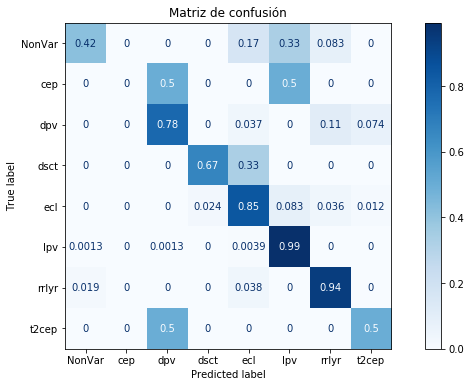

In [125]:
plt.figure(figsize=(15,8))
disp = plot_confusion_matrix(clf, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Matriz de confusión')

In [126]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, target_pred)
print('Accuracy: %f' % accuracy)


Accuracy: 0.958000


### Hiperparámetros

#### max_depth
El primer parámetro que se puede optimizar es la profundidad, indica qué tan profundo puede ser el árbol. Mientras más profundidad tenga, mayores divisiones tendrá y va a capturar más información sobre los datos.

#### min_samples_split
min_samples_split corresponde al mínimo número de muestras aleatorias requeridas para separar los nodos internos. Puede variar desde una separación a todas las posibles para cada nodo. Cuando se incrementa este hiperparámetro el árbol se constrae a medida que se consideran más muestras en cada nodo.

#### min_samples_leaf
min_samples_leaf corresponde al mínimo número de muestras requeridas para cada hoja del árbol. este parámetro es similar al anterior, sin embargo afecta a la base del árbol.

#### max_features
max_features representa el número de variables a considerar cuando se busca la mejor separación.




### Variación de Hiperparámetros

#### Max Depth: Profundidad del árbol

Generaremos un proceso en el que probaremos diferentes valores para la profundidad, obteniendo cuál es el mejor de ellos utilizando Cross Validation en 5 iteraciones.

In [127]:
np.random.seed(20)

#Variamos la profundidad del árbol utilizando un seteo de números 
param_dist = {"max_depth": [4,6,8,12]}

#Armamos el árbol con los parámetros estándar exceptuando la profundidad y usamos Cross Validation para mejorar el modelo.
tree_cv_depth = RandomizedSearchCV(clf, param_dist, cv=5)

tree_cv_depth.fit(X_train, y_train)

target_pred = tree_cv_depth.predict(X_test)


# Print the tuned parameters and score
print("Mejor parámetro de árbol tuneado: {}".format(tree_cv_depth.best_params_))
print("Mejor métrica: {}".format(tree_cv_depth.best_score_))


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mejor parámetro de árbol tuneado: {'max_depth': 12}
Mejor métrica: 0.9629999999999999


In [128]:
#Armamos el árbol con los parámetros estándar 
clf_max_depth = DecisionTreeClassifier(max_depth=12)

clf_max_depth.fit(X_train, y_train)
target_pred_depth = clf_max_depth.predict(X_test)


In [129]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, target_pred_depth)
print('Accuracy: %f' % accuracy)

Accuracy: 0.957000


#### Min_samples_leaf: Muestras mínimas para las hojas del árbol

Generaremos un proceso en el que probaremos diferentes valores para los muestreos de las hojas, obteniendo cuál es el mejor de ellos utilizando Cross Validation en 5 iteraciones.

In [130]:
np.random.seed(60)

#Variamos la profundidad del árbol utilizando un seteo de números 
param_dist = {"min_samples_leaf": randint(1, 10)}

#Armamos el árbol con los parámetros estándar exceptuando la profundidad y usamos Cross Validation para mejorar el modelo.
tree_cv_leaf = RandomizedSearchCV(clf, param_dist, cv=5)

tree_cv_leaf.fit(X_train, y_train)

target_pred = tree_cv_leaf.predict(X_test)


# Print the tuned parameters and score
print("Mejor parámetro de árbol tuneado: {}".format(tree_cv_leaf.best_params_))
print("Mejor métrica: {}".format(tree_cv_leaf.best_score_))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mejor parámetro de árbol tuneado: {'min_samples_leaf': 3}
Mejor métrica: 0.95975


In [131]:
#Armamos el árbol con los parámetros estándar 
clf_min_leaf = DecisionTreeClassifier(min_samples_leaf=3)
clf_min_leaf.fit(X_train, y_train)
target_pred_leaf = clf_min_leaf.predict(X_test)

In [132]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, target_pred_leaf)
print('Accuracy: %f' % accuracy)

Accuracy: 0.956000


#### Variación conjunta de hiperparámetros

Generamos el proceso para variar múltiples hiperparámetros y nos quedamos con la mejor combinación.

In [133]:
np.random.seed(99)

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [2, 4, 6, 8, 10, 12, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv_mix = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv_mix.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv_mix.best_params_))
print("Best score is {}".format(tree_cv_mix.best_score_))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.9637499999999999


In [134]:
#Armamos el árbol con los parámetros estándar 
clf_mix = DecisionTreeClassifier(criterion='gini', max_depth = 8, max_features = 8, min_samples_leaf = 2)
clf_mix.fit(X_train, y_train)
target_pred_mix = clf_mix.predict(X_test)

In [135]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, target_pred_mix)
print('Accuracy: %f' % accuracy)

Accuracy: 0.960000


### Comparación de matrices de confusión:

En este caso como pudimos ver se utilizó un modelo de árboles de decisión estándar en un comienzo, sin CV, y se compara con 3 modelos mediante el uso de CV junto con optimización de hiperparámetros. Podemos observar que en algunos casos la cantidad de falsos positivos o negativos disminuye, sin embargo la diagonal de la matriz de confusión que utilizaríamos para calcular el Accuracy no varía de gran manera. 
Podemos concluir que efectivamente, la modificación de los hiperparámetros afecta al modelo pero debemos realizar variaciones a combinaciones de estos junto con el k óptimo de CV que queremos evaluar.

#### Comparación matrices de confusion: Árbol estandar versus RandomizedSearchCV con tuneado de parámetros

In [136]:
#cargamos los nombres de nuestros modelos de clasificación.
classifiers = [clf, 
               tree_cv_depth,
               tree_cv_leaf, 
               tree_cv_mix]

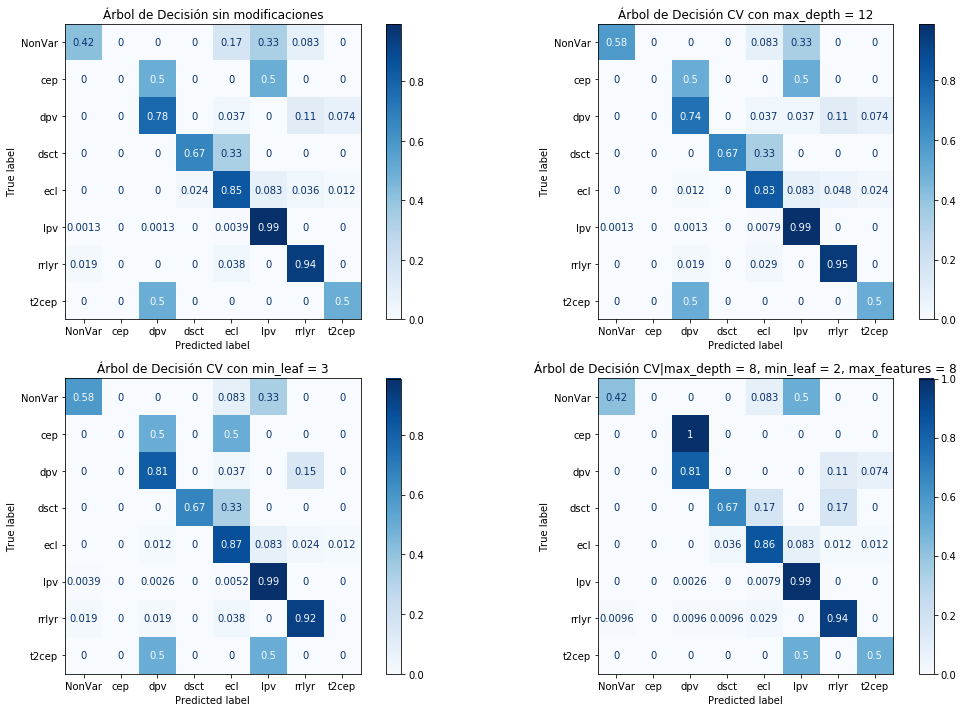

In [182]:
#generamos las multiples matrices de confusión
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         normalize='true')
axes[0, 0].set_title('Árbol de Decisión sin modificaciones')
axes[0, 1].set_title('Árbol de Decisión CV con max_depth = 12') 
axes[1, 0].set_title('Árbol de Decisión CV con min_leaf = 3') 
axes[1, 1].set_title('Árbol de Decisión CV|max_depth = 8, min_leaf = 2, max_features = 8') 
plt.tight_layout()  
plt.show()

#### Comparación matrices de confusion: Árbol estandar versus Árboles estándar con parámetros modificados

In [138]:
#cargamos los nombres de nuestros modelos de clasificación.
classifiers2 = [clf, 
               clf_max_depth,
               clf_min_leaf, 
               clf_mix]

names = ['Arbol estándar',
        'Árbol con max depth modificado',
        'Árbol con min leaf modificado',
        'Árbol con múltiples hiperparámetros modificados']

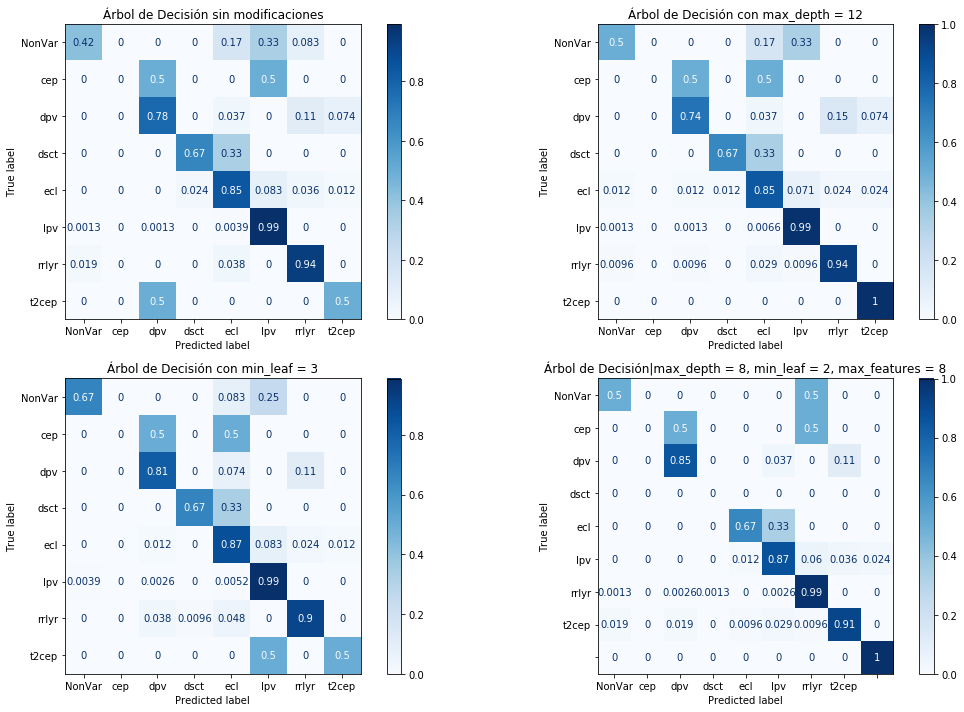

In [183]:
#generamos las multiples matrices de confusión
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers2, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         normalize='true')
axes[0, 0].set_title('Árbol de Decisión sin modificaciones')
axes[0, 1].set_title('Árbol de Decisión con max_depth = 12') 
axes[1, 0].set_title('Árbol de Decisión con min_leaf = 3') 
axes[1, 1].set_title('Árbol de Decisión|max_depth = 8, min_leaf = 2, max_features = 8') 
plt.tight_layout()  
plt.show()

In [191]:
# accuracy: (tp + tn) / (p + n)
accuracy_mix = accuracy_score(y_test, target_pred_mix)
accuracy_leaf = accuracy_score(y_test, target_pred_leaf)
accuracy_depth = accuracy_score(y_test, target_pred_depth)
accuracy_normal = accuracy_score(y_test, target_pred)

recall_mix = recall_score(y_test, target_pred_mix, average='macro')
recall_leaf = recall_score(y_test, target_pred_leaf, average='macro')
recall_depth = recall_score(y_test, target_pred_depth, average='macro')
recall_normal = recall_score(y_test, target_pred, average='macro')

precision_mix = precision_score(y_test, target_pred_mix, average='macro')
precision_leaf = precision_score(y_test, target_pred_leaf, average='macro')
precision_depth = precision_score(y_test, target_pred_depth, average='macro')
precision_normal = precision_score(y_test, target_pred, average='macro')

print('Métrica de Accuracy: ')
print('\nAccuracy Árbol estándar: %f' % accuracy_normal)
print('Accuracy Árbol con modificación en la profundidad: %f' % accuracy_depth)
print('Accuracy Árbol con modificación en las hojas: %f' % accuracy_leaf)
print('Accuracy Árbol con modificación en criterio, hojas, profundidad: %f' % accuracy_mix)

print('Métrica de Recall: ')
print('\nRecall Árbol estándar: %f' % recall_normal)
print('Recall Árbol con modificación en la profundidad: %f' % recall_depth)
print('Recall Árbol con modificación en las hojas: %f' % recall_leaf)
print('Recall Árbol con modificación en criterio, hojas, profundidad: %f' % recall_mix)

print('Métrica de Precision: ')
print('\nPrecision Árbol estándar: %f' % precision_normal)
print('Precision Árbol con modificación en la profundidad: %f' % precision_depth)
print('Precision Árbol con modificación en las hojas: %f' % precision_leaf)
print('Precision Árbol con modificación en criterio, hojas, profundidad: %f' % precision_mix)

Métrica de Accuracy: 

Accuracy Árbol estándar: 0.956000
Accuracy Árbol con modificación en la profundidad: 0.957000
Accuracy Árbol con modificación en las hojas: 0.956000
Accuracy Árbol con modificación en criterio, hojas, profundidad: 0.960000
Métrica de Recall: 

Recall Árbol estándar: 0.605643
Recall Árbol con modificación en la profundidad: 0.710722
Recall Árbol con modificación en las hojas: 0.676156
Recall Árbol con modificación en criterio, hojas, profundidad: 0.643685
Métrica de Precision: 

Precision Árbol estándar: 0.639538
Precision Árbol con modificación en la profundidad: 0.674574
Precision Árbol con modificación en las hojas: 0.690658
Precision Árbol con modificación en criterio, hojas, profundidad: 0.608856


### Conclusión: 
El mejor modelo en el caso de la comparación de árboles estándar es el que tiene modificaciones en la profundidad puesto que es el que posee mejor métrica general de Accuracy y Recall, siendo la Precision de los 2 mejores modelos

## Random Forest
A continuación utilizaremos el modelo de random forest para compararlo con el modelo de árboles de decisión que probamos anteriormente (versión con modificación en la profundidad)

In [141]:
np.random.seed(99)
#Creamos clasificador Gaussiano
clf_rand=RandomForestClassifier(n_estimators=100)

#Entrenamiento del modelo
clf_rand.fit(X_train,y_train)

target_pred_random_forest=clf_rand.predict(X_test)

In [192]:
print("Accuracy Random Forest:",accuracy_score(y_test, target_pred_random_forest))
print("Recall Random Forest:",recall_score(y_test, target_pred_random_forest, average='macro'))
print("Precision Random Forest:",precision_score(y_test, target_pred_random_forest, average='macro'))


Accuracy Random Forest: 0.971
Recall Random Forest: 0.6724313000115753
Precision Random Forest: 0.841735395433582


### Hiperparámetros:
Dado que los hiperparámetros del random forest son similares a los del árbol de decisión podemos de todos modos alterar la profundidad o la separación de las muestras de las hojas para poder buscar una mejor optimización

In [143]:
np.random.seed(99)
#Creamos clasificador Gaussiano
clf_rand_estimator=RandomForestClassifier(n_estimators=80)

#Entrenamiento del modelo
clf_rand_estimator.fit(X_train,y_train)

target_pred_random_forest_leaf=clf_rand_estimator.predict(X_test)

In [193]:
print("Accuracy Random Forest:",accuracy_score(y_test, target_pred_random_forest_leaf))
print("Recall Random Forest:",recall_score(y_test, target_pred_random_forest_leaf, average='macro'))
print("Precision Random Forest:",precision_score(y_test, target_pred_random_forest_leaf, average='macro'))

Accuracy Random Forest: 0.973
Recall Random Forest: 0.6690481091283844
Precision Random Forest: 0.8446128782368074


### Conclusiones
En este caso con la variación que hicimos del número de árboles que tendrá el modelo random forest obtenemos una predicción ligeramente mejor en términos del Accuracy del modelo junto con la Precisión, ya que el Recall disminuye muy poco, por lo que nos sirve como punto de comparación con nuestro árbol modificado en la profundidad.

In [145]:
#cargamos los nombres de nuestros modelos de clasificación.
classifiers3 = [clf_max_depth,
               clf_rand_estimator]

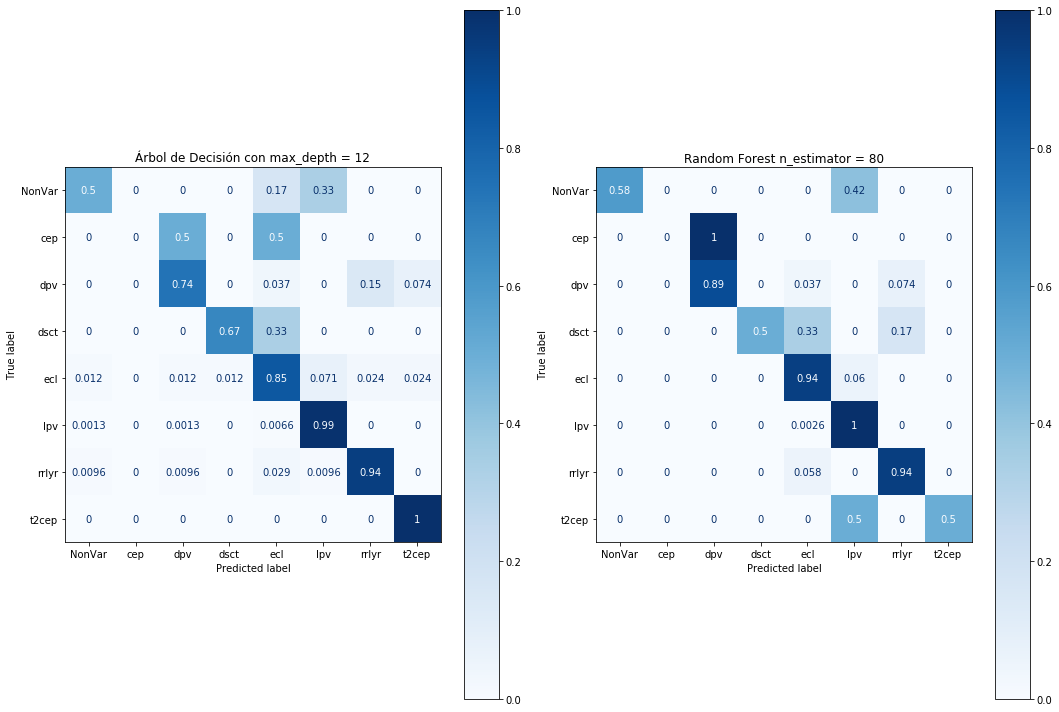

In [185]:
#generamos las multiples matrices de confusión
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers3, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         normalize='true')
    ax.title.set_text(type(cls).__name__)
axes[0].set_title('Árbol de Decisión con max_depth = 12')
axes[1].set_title('Random Forest n_estimator = 80') 
   
plt.tight_layout()  
plt.show()

In [194]:
print('Árbol de decisión')

print('\nAccuracy Árbol con modificación en la profundidad: %f' % accuracy_depth)
print('Recall Árbol con modificación en la profundidad: %f' % recall_depth)
print('Precision Árbol con modificación en la profundidad: %f' % precision_depth)

print('Random Forest')

print("\nAccuracy Random Forest con estimadores = 80:",accuracy_score(y_test, target_pred_random_forest_leaf))
print("Recall Random Forest con estimadores = 80:",recall_score(y_test, target_pred_random_forest_leaf, average='macro'))
print("Precision Random Forest con estimadores = 80:",precision_score(y_test, target_pred_random_forest_leaf, average='macro'))

Árbol de decisión

Accuracy Árbol con modificación en la profundidad: 0.957000
Recall Árbol con modificación en la profundidad: 0.710722
Precision Árbol con modificación en la profundidad: 0.674574
Random Forest

Accuracy Random Forest con estimadores = 80: 0.973
Recall Random Forest con estimadores = 80: 0.6690481091283844
Precision Random Forest con estimadores = 80: 0.8446128782368074


## Conclusiones: 
Como se puede apreciar el modelo que es superior es el Random forest puesto que posee una precision altamente superior, un Accuracy superior y Recall ligeramente menor.

## KNN
A continuación generaremos el modelo KNN determinando el número de k vecinos y normalizando los datos

In [148]:
## método que grafica la matriz de confusión
def plot_cm(y_true, y_pred, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0.0%'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Valores Verdaderos'
    cm.columns.name = 'Prediccion'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [149]:
#Normalizamos los features utilizando el criterio MinMax
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [150]:
#Generamos un modelo KNN con k =10
np.random.seed(99)
clf_knn = KNeighborsClassifier(n_neighbors=10) 
clf_knn.fit(X_train, y_train)                                        
target_pred_knn = clf_knn.predict(X_test)

Text(0.5, 1.0, 'Matriz de confusión KNN, K = 10')

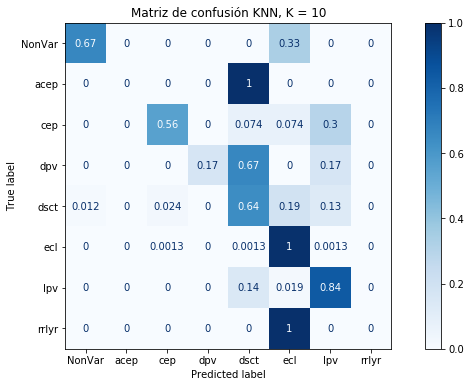

In [151]:
#Generamos matriz de confusión
disp = plot_confusion_matrix(clf_knn, X_test, y_test,
                                 display_labels=np.unique(y),
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Matriz de confusión KNN, K = 10')

In [195]:
#Accuracy de la predicción
print("Accuracy KNN:",accuracy_score(y_test, target_pred_knn))
print("Recall KNN:",recall_score(y_test, target_pred_knn, average='macro'))
print("Precision KNN:",precision_score(y_test, target_pred_knn, average='macro'))

Accuracy KNN: 0.925
Recall KNN: 0.4830440806644935
Precision KNN: 0.6483758237097932


### Selección del k óptimo: 
Para esto utilizaremos GridSearchCV que se basa en el uso de Cross Validation sobre los hiperparámetros, la métrica que utilizaremos para optimizar el hiperparámetro k será el Accuracy

In [153]:
#variable y 
y2 = ts2[['Class']]
#create new a knn model
clf2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(clf2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_scaled, y2)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  e

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [154]:
#check top performing n_neighbors value
#K = 5 maximiza el accuracy
knn_gscv.best_params_

{'n_neighbors': 4}

In [155]:
#K = 4 maximiza el Accuracy, por lo que es el k que escogeremos.
results_knn_cv = pd.DataFrame(knn_gscv.cv_results_)[['params','mean_test_score']]
print(results_knn_cv)

                 params  mean_test_score
0    {'n_neighbors': 1}           0.9482
1    {'n_neighbors': 2}           0.9404
2    {'n_neighbors': 3}           0.9490
3    {'n_neighbors': 4}           0.9496
4    {'n_neighbors': 5}           0.9476
5    {'n_neighbors': 6}           0.9472
6    {'n_neighbors': 7}           0.9484
7    {'n_neighbors': 8}           0.9464
8    {'n_neighbors': 9}           0.9450
9   {'n_neighbors': 10}           0.9462
10  {'n_neighbors': 11}           0.9462
11  {'n_neighbors': 12}           0.9466
12  {'n_neighbors': 13}           0.9440
13  {'n_neighbors': 14}           0.9450
14  {'n_neighbors': 15}           0.9438
15  {'n_neighbors': 16}           0.9438
16  {'n_neighbors': 17}           0.9436
17  {'n_neighbors': 18}           0.9438
18  {'n_neighbors': 19}           0.9424
19  {'n_neighbors': 20}           0.9432
20  {'n_neighbors': 21}           0.9426
21  {'n_neighbors': 22}           0.9428
22  {'n_neighbors': 23}           0.9414
23  {'n_neighbor

Text(0.5, 1.0, 'Matriz de confusión KNN, K = 4')

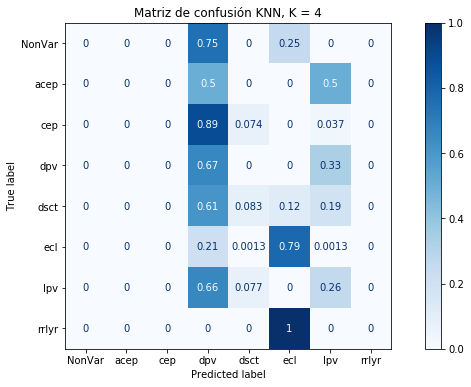

In [156]:
#Matriz de confusión para K = 5 usando split del inicio
disp = plot_confusion_matrix(knn_gscv, X_test, y_test,
                                 display_labels=np.unique(y),
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Matriz de confusión KNN, K = 4')

Text(0.5, 1.0, 'Matriz de confusión Árbol de decisión, max depth = 12')

<Figure size 1080x576 with 0 Axes>

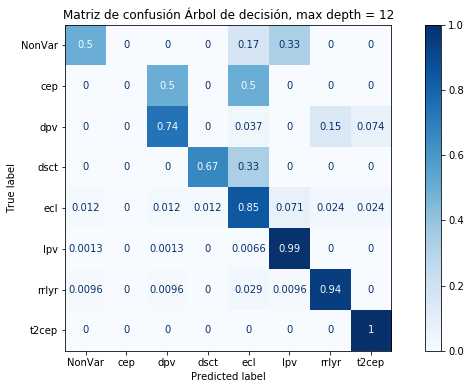

In [162]:
plt.figure(figsize=(15,8))
disp = plot_confusion_matrix(clf_max_depth, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Matriz de confusión Árbol de decisión, max depth = 12')

Text(0.5, 1.0, 'Matriz de confusión Random Forest, estimadores = 80')

<Figure size 1080x576 with 0 Axes>

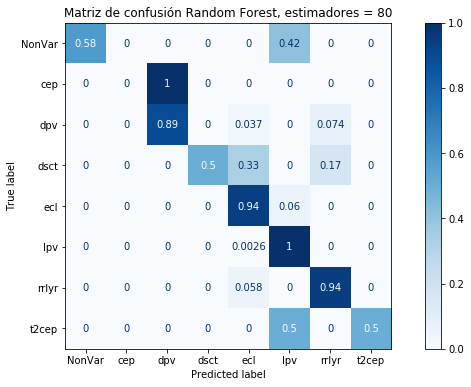

In [186]:
plt.figure(figsize=(15,8))
disp = plot_confusion_matrix(clf_rand_estimator, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Matriz de confusión Random Forest, estimadores = 80')

In [196]:
#Accuracy con k = 5
print('Accuracy con k = 5:', knn_gscv.best_score_)
print('Accuracy Árbol con modificación en la profundidad: %f' % accuracy_depth)
print("Accuracy Random Forest:",accuracy_score(y_test, target_pred_random_forest_leaf))


Accuracy con k = 5: 0.9496
Accuracy Árbol con modificación en la profundidad: 0.957000
Accuracy Random Forest: 0.973


## Conclusión:
El modelo con la mejor métrica de Accuracy que es la que utilizamos consistentemente fue el Random Forest con 80 iteraciones, como vimos además en la comparación con el resto de los modelos se pudo apreciar que presenta en su mayoría todas las métricas superiores, esto es ya que es un modelo bastante potente que compara una serie de múltiples árboles de decisión, escogiendo el que mejor presenta un ajuste a los datos.